In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle as pk


In [10]:
energy = [[] for k in range(2, 8)]
for k in range(2, 8):
    with open('VaryM\\QMCENERG_x=z_beta1_m' + str(k) + '.txt', 'rb') as fichier:
        energy[k - 2] = pk.load(fichier)

In [19]:
print(len(x))

10000


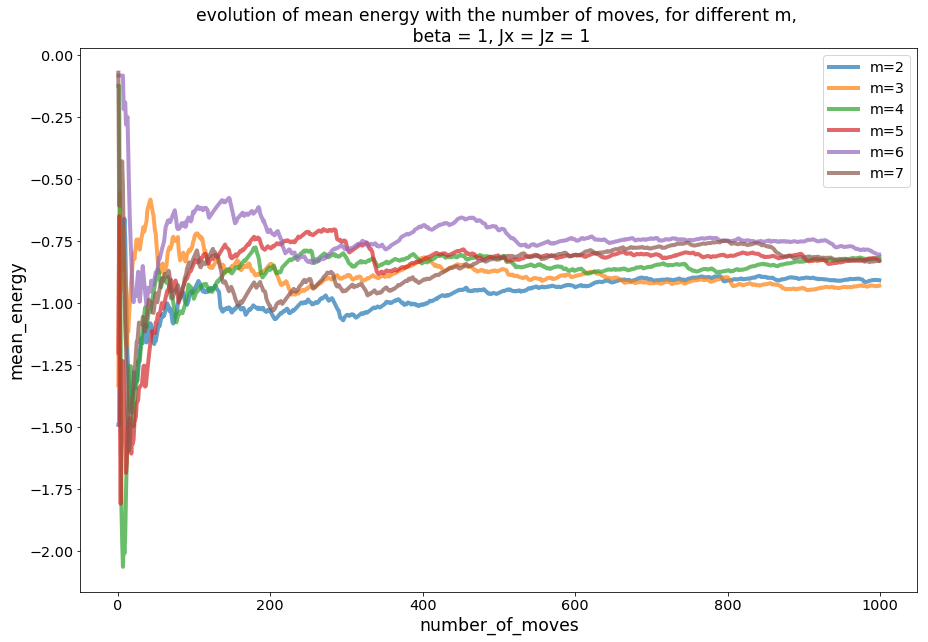

In [27]:
fig = plt.figure(figsize = (15,10))
x=np.arange(1, 1e3)
menergy = [[] for k in range(2,8)]
for k in range(2, 8):
    menergy[k - 2] = np.cumsum(energy[k - 2][1:10000]) / x


plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('mean_energy', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('evolution of mean energy with the number of moves, for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('mean_energy_evolution_centerd_x=z=1_m2-6.png')

In [ ]:
Energies = np.array(e3[:100000-500])
sqmean = np.mean(Energies * Energies)
meansq = np.mean(Energies)**2
autocorr3 = np.zeros(500)
for t in range (500):
    Energies_tmove = (e3[t:t+100000-500])
    corr = np.mean(Energies * Energies_tmove)
    autocorr3[t] = (corr - meansq)/(sqmean - meansq)
x=np.linspace(0,499,500)
plt.plot(x,autocorr3)


fig = plt.figure(figsize = (15,10))
x=np.linspace(0,4990,500)



plt.xlabel('number_of_moves', fontsize = 'xx-large')
plt.ylabel('autocorrelation', fontsize = 'xx-large')
plt.xticks(fontsize = 'x-large')
plt.yticks(fontsize = 'x-large')
plt.title('Autocorrelation function for different m, \n beta = 1, Jx = Jz = 1', fontsize = 'xx-large')

for k in range(2, 8):
    plt.plot(x, menergy[k-2], label = 'm='+str(k), lw = 4, alpha = 0.7)


plt.legend(loc = 0, fontsize = 'x-large')
plt.savefig('autocorrelation_functionx=z=1_m2-6.png')